# Dataset

### Downloading

Run on Git Bash terminal<br>
<code> pip3 install zenodo_get</code><br>
<code> mkdir data </code><br>
<code> cd data </code><br>
<code> zenodo_get 10.5281/zenodo.10159290 </code><br>
<code> unzip  images.zip</code><br>
<code> unzip  masks.zip</code><br>
<code> git rm  images.zip</code><br>

### Exploration

Run on Terminal<br>
<code>pip install medpy</code><br>
<code>pip install SimpleITK matplotlib</code><br>
<code>pip install nibabel</code><br>

In [43]:
# Libraries
import pandas as pd
import numpy as np
# import torch
# from torchvision import datasets, transforms
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
# import nibabel as nib

In [28]:
# Important PATHS
IMG_DIR = r'data\images'
MASK_DIR = r'data\masks'
TEST_IMG_T1 = r'data\images\105_t1.mha'
TEST_IMG = r'data\images\105_t2.mha'
TEST_MASK = r'data\masks\105_t2.mha'

#### Image & Mask Size

In [27]:
def get_image_size(image_path):
    image = sitk.ReadImage(image_path)
    image_array = sitk.GetArrayFromImage(image)
    return image_array.shape

In [29]:
t1_size = get_image_size(TEST_IMG_T1)
t2_size = get_image_size(TEST_IMG)
mask_size = get_image_size(TEST_MASK)

print("T1 image size:", t1_size)
print("T2 image size:", t2_size)
print("Mask size: ", mask_size)

T1 image size: (427, 448, 25)
T2 image size: (427, 448, 25)
Mask size:  (427, 448, 25)


#### Visulaizing Image & Mask

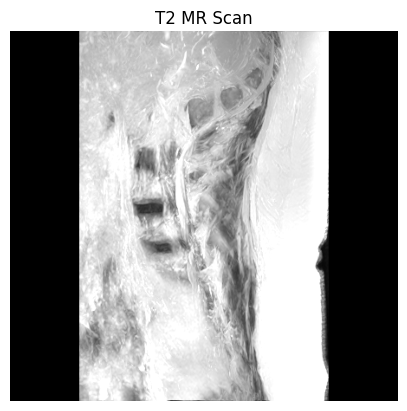

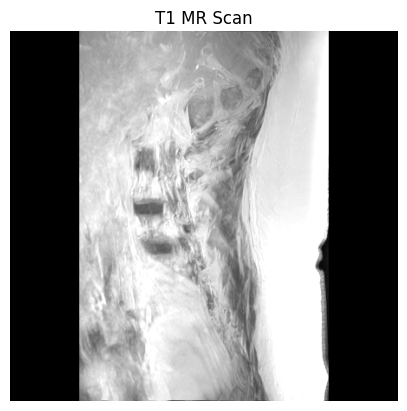

In [31]:
img = sitk.ReadImage(TEST_IMG)
img_arr = sitk.GetArrayFromImage(img)
caster = sitk.MaximumProjectionImageFilter()
img = caster.Execute(img)
img_arr = sitk.GetArrayFromImage(img)
plt.imshow(img_arr, cmap='gray')
plt.title("T2 MR Scan")
plt.axis('off')
plt.show();

img = sitk.ReadImage(TEST_IMG_T1)
img_arr = sitk.GetArrayFromImage(img)
caster = sitk.MaximumProjectionImageFilter()
img = caster.Execute(img)
img_arr = sitk.GetArrayFromImage(img)
plt.imshow(img_arr, cmap='gray')
plt.title("T1 MR Scan")
plt.axis('off')
plt.show();

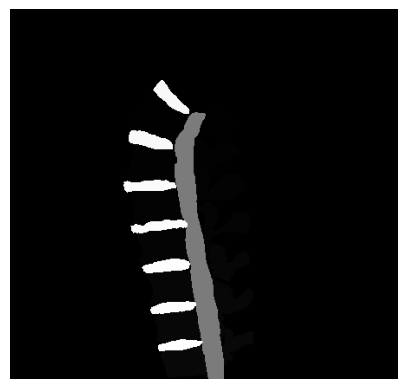

In [26]:
img = sitk.ReadImage(TEST_MASK)
img_arr = sitk.GetArrayFromImage(img)
caster = sitk.MaximumProjectionImageFilter()
img = caster.Execute(img)
img_arr = sitk.GetArrayFromImage(img)
plt.imshow(img_arr, cmap='gray')
plt.axis('off')
plt.show();

#### Preprocessing

In [38]:
def check_format(image_path, target_format=".mha"): #, target_spacing=(1.0, 1.0, 1.0)):
  try:
    # img = nib.load(image_path)
    img = sitk.ReadImage(image_path)
    # img_arr = sitk.GetArrayFromImage(img)
    image_format = os.path.splitext(image_path)[1].lower()
    # spacing = img.header.get_spacing()
    return image_format == target_format
  except Exception as e:
    print(f"Error processing file {image_path}: {e}")
    return False

In [40]:
for filename in os.listdir(IMG_DIR):
    if filename.lower().endswith(".mha"):
        image_path = os.path.join(IMG_DIR, filename)
        format_match = check_format(image_path, ".mha")
        if not format_match:
            print(f"File {filename} has incorrect format. Expected .mha")

print("Successfully Checked")

Successfully Checked


#### Splitting

In [ ]:
def parse_img_mask(path):
    img = tf.io.read_file(path)
    mask = tf.io.read_file(path)

    return image, mask

In [45]:
images = np.array(sorted([os.path.join(IMG_DIR, fname)
                          for fname in os.listdir(IMG_DIR)]))
masks = np.array(sorted([os.path.join(MASK_DIR, fname)
                          for fname in os.listdir(MASK_DIR)]))

In [46]:
images_trainFiles, images_validateFiles = train_test_split(images, test_size=0.3, random_state=123)
masks_tarinFiles, masks_validateFiles = train_test_split(masks, test_size=0.3, random_state=123)

In [ ]:
# Tensorflow Datasets
imgs_train = tf.data.Dataset.from_tensor_slices(images_trainFiles)
imgs_train = imgs_train.map()